In [1]:
import numpy as np
import pandas as pd

In [2]:
merged_df = pd.read_csv("C:/Users/tushar/Data Science/Project/merged_daily_covid_mobility_data.csv")
print(merged_df.shape,"\n")
print(merged_df.head())

(126138, 30) 

      location        date iso_code continent   total_cases  new_cases  \
0  Afghanistan  2020-02-15      AFG      Asia  1.684088e+06        0.0   
1  Afghanistan  2020-02-16      AFG      Asia  1.684088e+06        0.0   
2  Afghanistan  2020-02-17      AFG      Asia  1.684088e+06        0.0   
3  Afghanistan  2020-02-18      AFG      Asia  1.684088e+06        0.0   
4  Afghanistan  2020-02-19      AFG      Asia  1.684088e+06        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0  21924.653258         0.0            104108.530163                    0.0   
1  21924.653258         0.0            104108.530163                    0.0   
2  21924.653258         0.0            104108.530163                    0.0   
3  21924.653258         0.0            104108.530163                    0.0   
4  21924.653258         0.0            104108.530163                    0.0   

   ...  human_development_index  population  country_region  \
0 

In [3]:
#Check null values in specific columns
print(merged_df.isnull().sum())

# Finding numerical columns and categorical columns
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('date')

#Defining quantitative columns
strings_to_remove = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million']
quantitative_columns = [item for item in numerical_columns if item not in strings_to_remove]

print("Numerical columns:")
print(numerical_columns)

print("Categorical columns:")
print(categorical_columns)

print("Quantitative columns:\n",quantitative_columns)

location                                              0
date                                                  0
iso_code                                              0
continent                                             0
total_cases                                           0
new_cases                                             0
total_deaths                                          0
new_deaths                                            0
total_cases_per_million                               0
new_cases_per_million                                 0
total_deaths_per_million                              0
new_deaths_per_million                                0
population_density                                    0
median_age                                            0
aged_65_older                                         0
aged_70_older                                         0
gdp_per_capita                                        0
cardiovasc_death_rate                           

In [4]:
# Calculate basic statistics of numerical columns
stats = merged_df[numerical_columns].describe()
print(stats)

# Calculate mode for numerical columns
modes = merged_df[numerical_columns].mode(dropna=True).iloc[0]

print("Mode for numerical columns:")
print(modes)

# Find unique values and their frequencies for categorical columns
for column in categorical_columns:
    unique_values = merged_df[column].unique()
    frequencies = merged_df[column].value_counts()
    
    print(f"Unique values for '{column}':")
    print(unique_values)
    print(f"Frequencies for '{column}':")
    print(frequencies)
    print("\n")

        total_cases     new_cases  total_deaths     new_deaths  \
count  1.261380e+05  1.261380e+05  1.261380e+05  126138.000000   
mean   1.731981e+06  4.734863e+03  2.757762e+04      49.880231   
std    6.046165e+06  3.099934e+04  8.583365e+04     226.121874   
min    1.000000e+00  0.000000e+00  1.000000e+00       0.000000   
25%    1.878400e+04  0.000000e+00  4.280000e+02       0.000000   
50%    1.999720e+05  1.570000e+02  3.840000e+03       1.000000   
75%    1.079710e+06  1.464000e+03  2.192465e+04      17.000000   
max    9.560270e+07  2.417043e+06  1.053622e+06   11447.000000   

       total_cases_per_million  new_cases_per_million  \
count            126138.000000          126138.000000   
mean              64174.204976             183.324763   
std              100294.753195             850.558330   
min                   0.004000               0.000000   
25%                1789.681500               0.000000   
50%               19475.206000              11.858000   
75%   

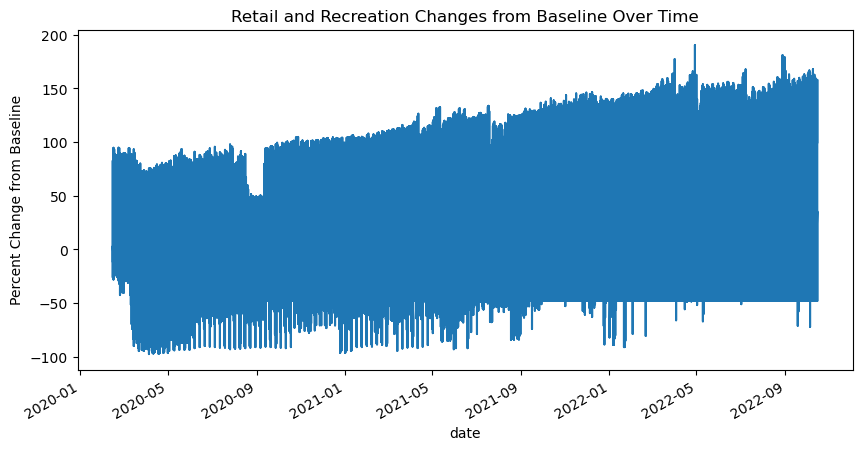

In [5]:
import matplotlib.pyplot as plt

# Convert date to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Set the date as the index
merged_df.set_index('date', inplace=True)

# Plotting changes over time for retail and recreation
merged_df['retail_and_recreation_percent_change_from_baseline'].plot(figsize=(10,5))
plt.title('Retail and Recreation Changes from Baseline Over Time')
plt.ylabel('Percent Change from Baseline')
plt.show()

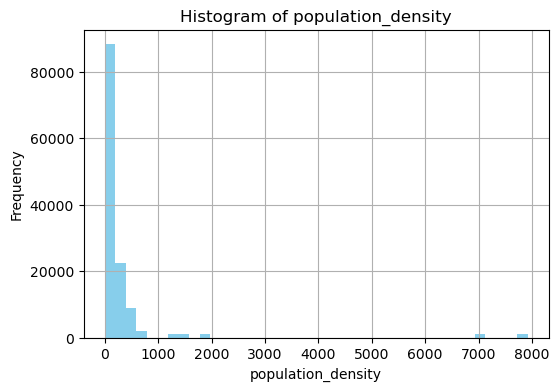

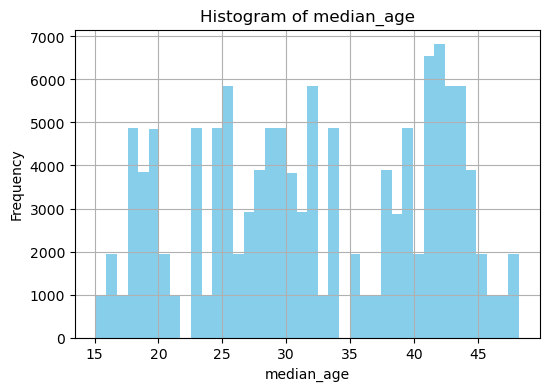

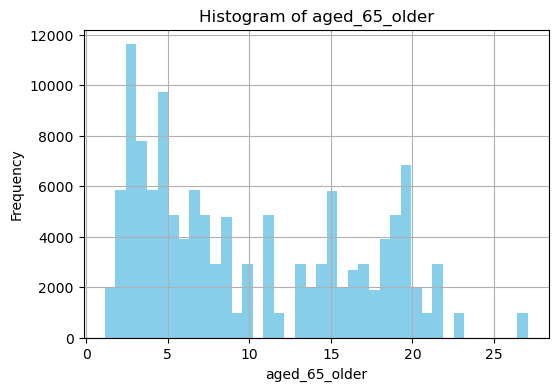

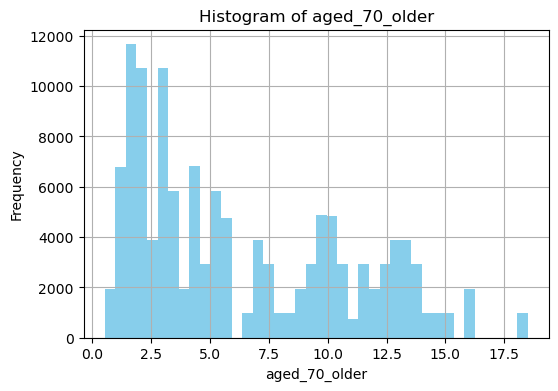

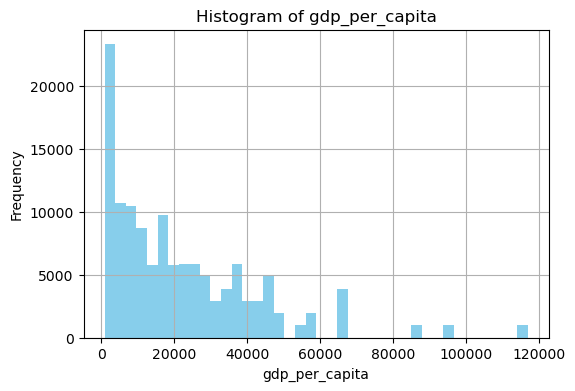

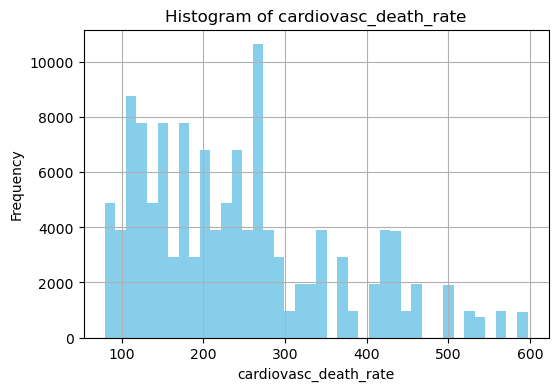

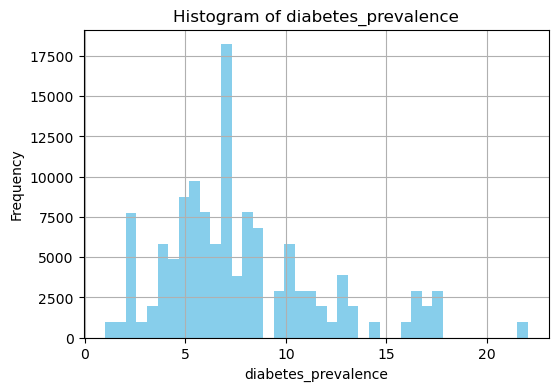

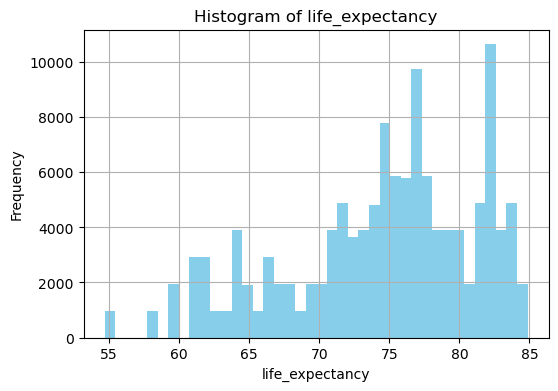

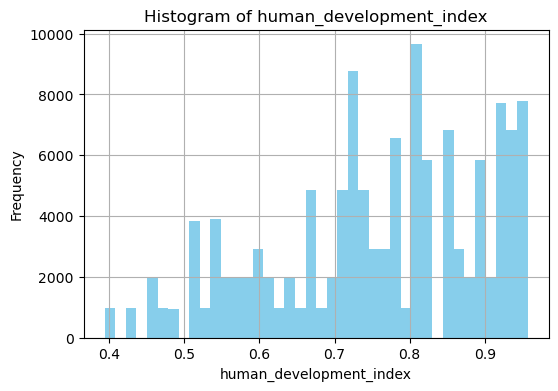

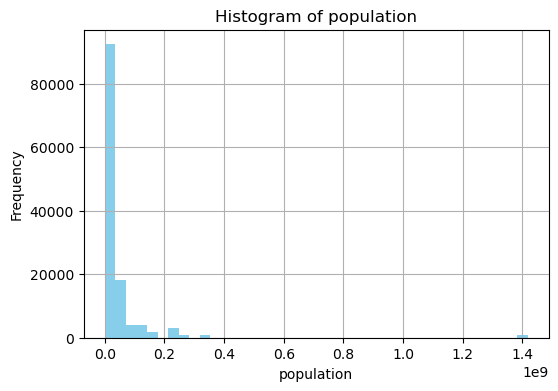

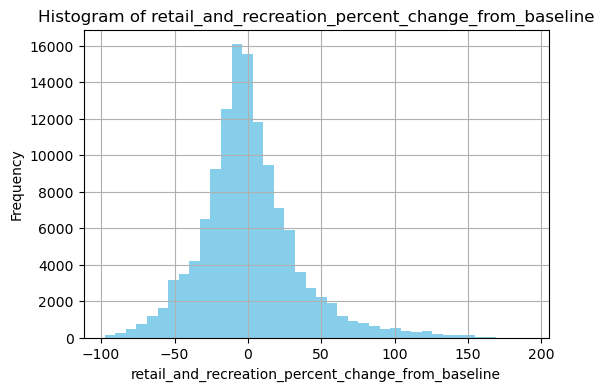

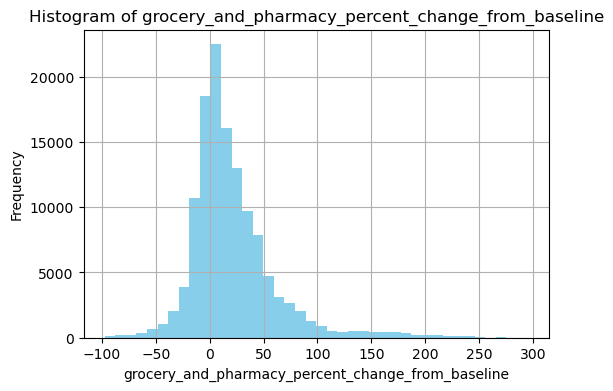

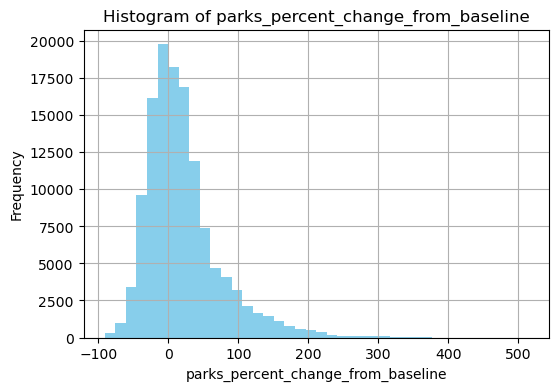

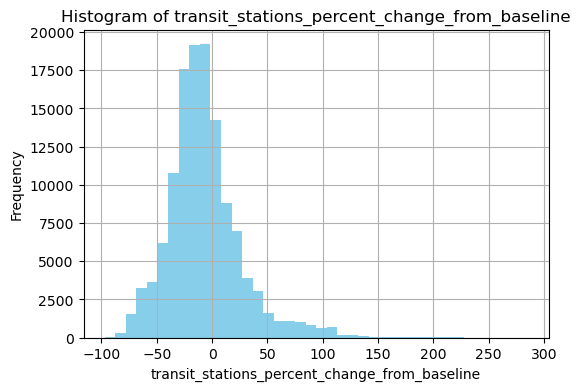

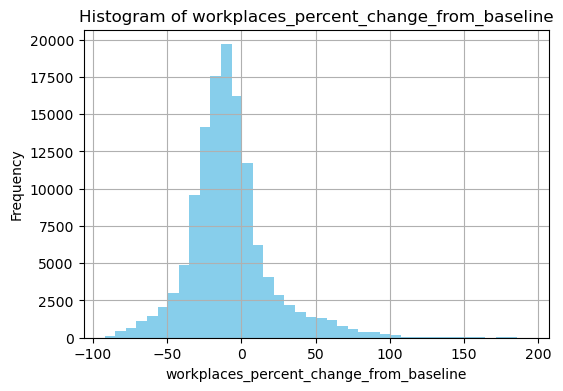

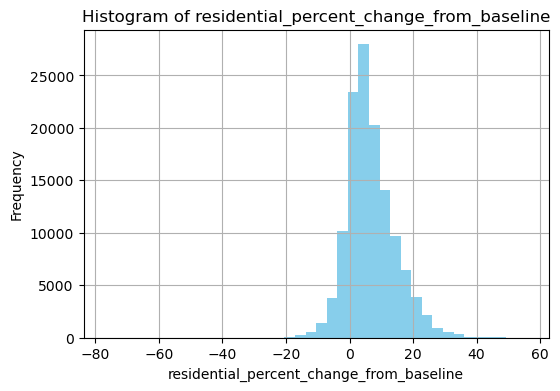

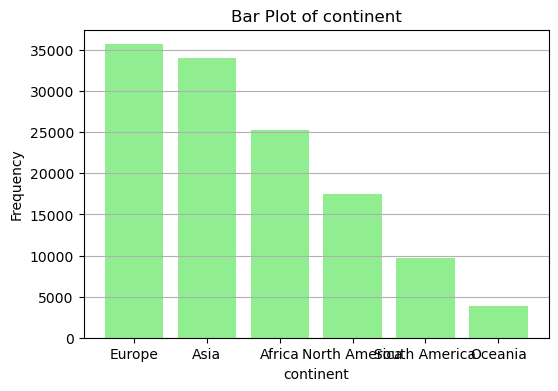

In [6]:
# Creating histograms for quantitative data
for col in quantitative_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(merged_df[col], bins=40, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Creating bar plots for qualitative data

plt.figure(figsize=(6, 4))
plt.bar(merged_df['continent'].value_counts().index, merged_df['continent'].value_counts().values, color='lightgreen')
plt.title('Bar Plot of continent')
plt.xlabel('continent')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

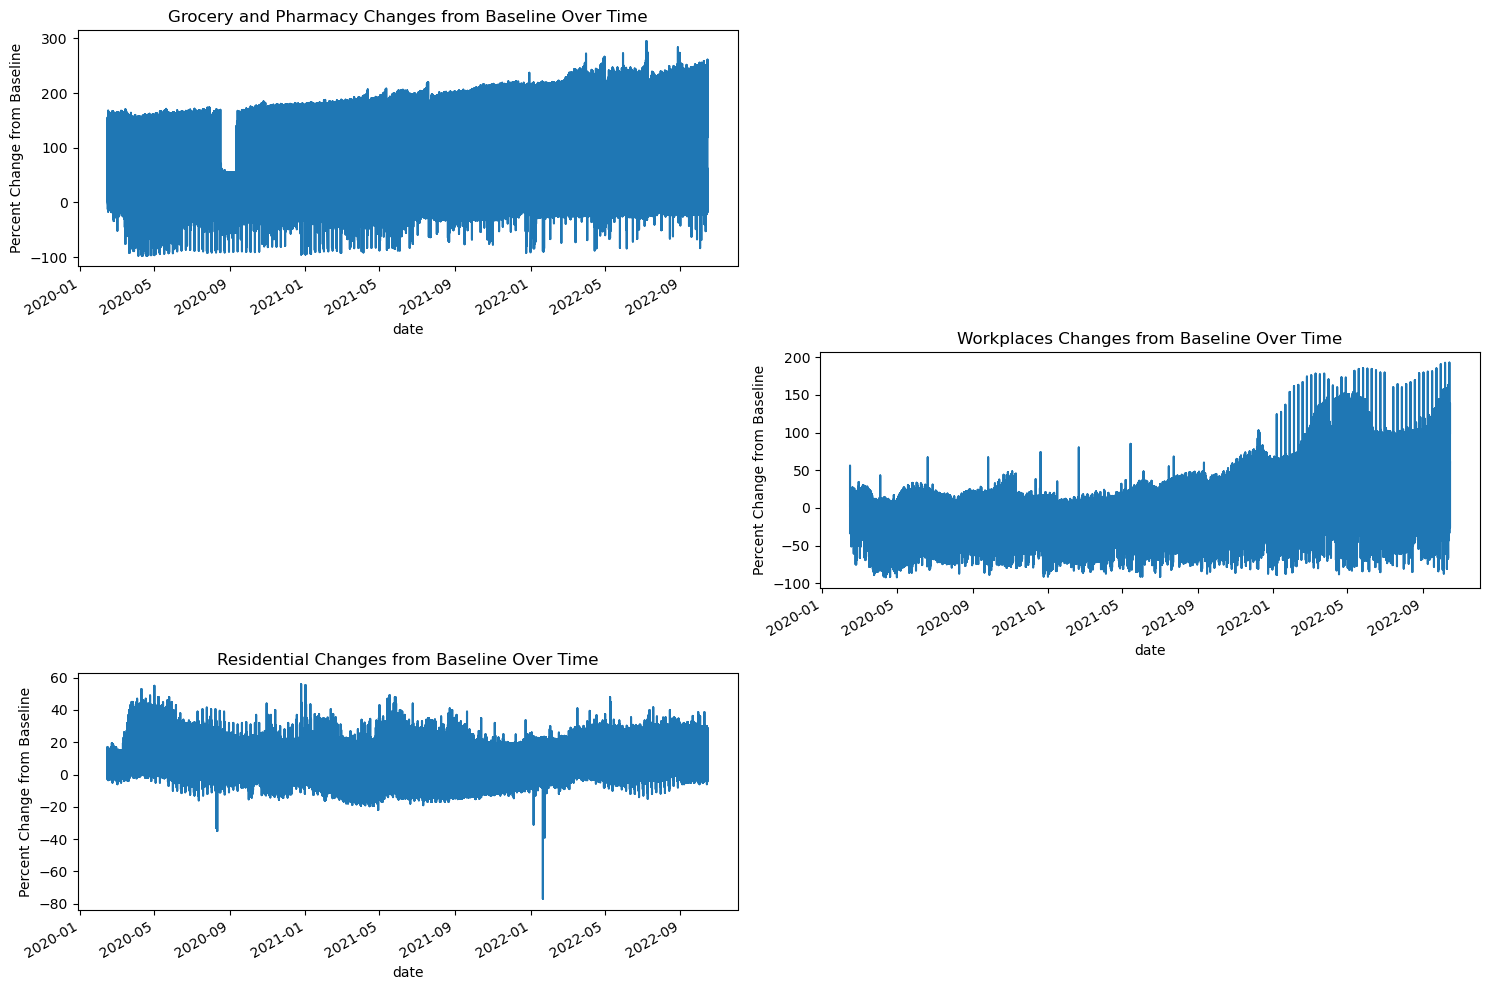

In [7]:
# Plot settings
plt.figure(figsize=(15, 10))

# Plot for grocery and pharmacy
plt.subplot(3, 2, 1)
merged_df['grocery_and_pharmacy_percent_change_from_baseline'].plot()
plt.title('Grocery and Pharmacy Changes from Baseline Over Time')
plt.ylabel('Percent Change from Baseline')

# Plot for workplaces
plt.subplot(3, 2, 4)
merged_df['workplaces_percent_change_from_baseline'].plot()
plt.title('Workplaces Changes from Baseline Over Time')
plt.ylabel('Percent Change from Baseline')

# Plot for residential
plt.subplot(3, 2, 5)
merged_df['residential_percent_change_from_baseline'].plot()
plt.title('Residential Changes from Baseline Over Time')
plt.ylabel('Percent Change from Baseline')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()


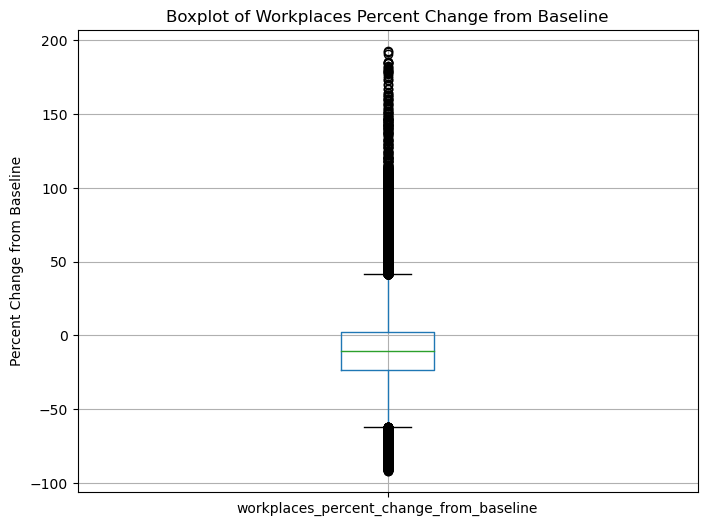

In [8]:
# Boxplot for Workplaces percent change
plt.figure(figsize=(8, 6))
merged_df.boxplot(column='workplaces_percent_change_from_baseline')
plt.title('Boxplot of Workplaces Percent Change from Baseline')
plt.ylabel('Percent Change from Baseline')
plt.show()

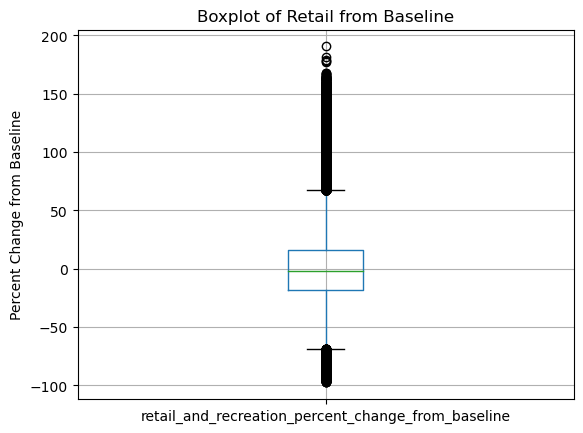

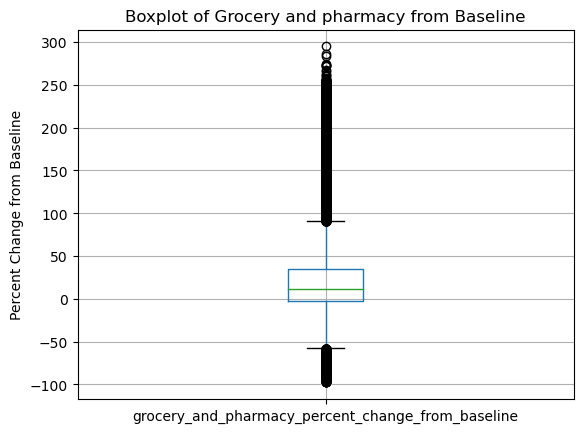

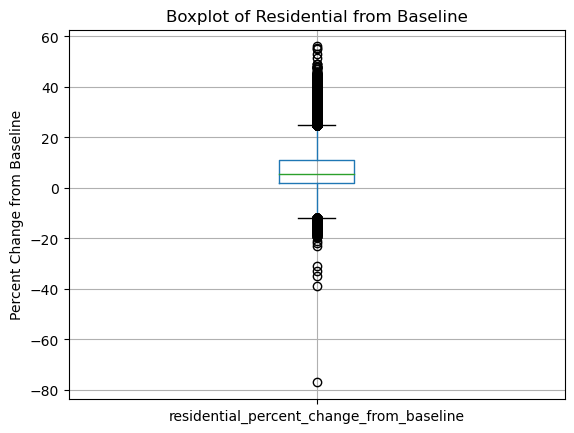

In [9]:
merged_df.boxplot(column='retail_and_recreation_percent_change_from_baseline')
plt.title('Boxplot of Retail from Baseline')
plt.ylabel('Percent Change from Baseline')
plt.show()

merged_df.boxplot(column='grocery_and_pharmacy_percent_change_from_baseline')
plt.title('Boxplot of Grocery and pharmacy from Baseline')
plt.ylabel('Percent Change from Baseline')
plt.show()

merged_df.boxplot(column='residential_percent_change_from_baseline')
plt.title('Boxplot of Residential from Baseline')
plt.ylabel('Percent Change from Baseline')
plt.show()

# Correlation Map

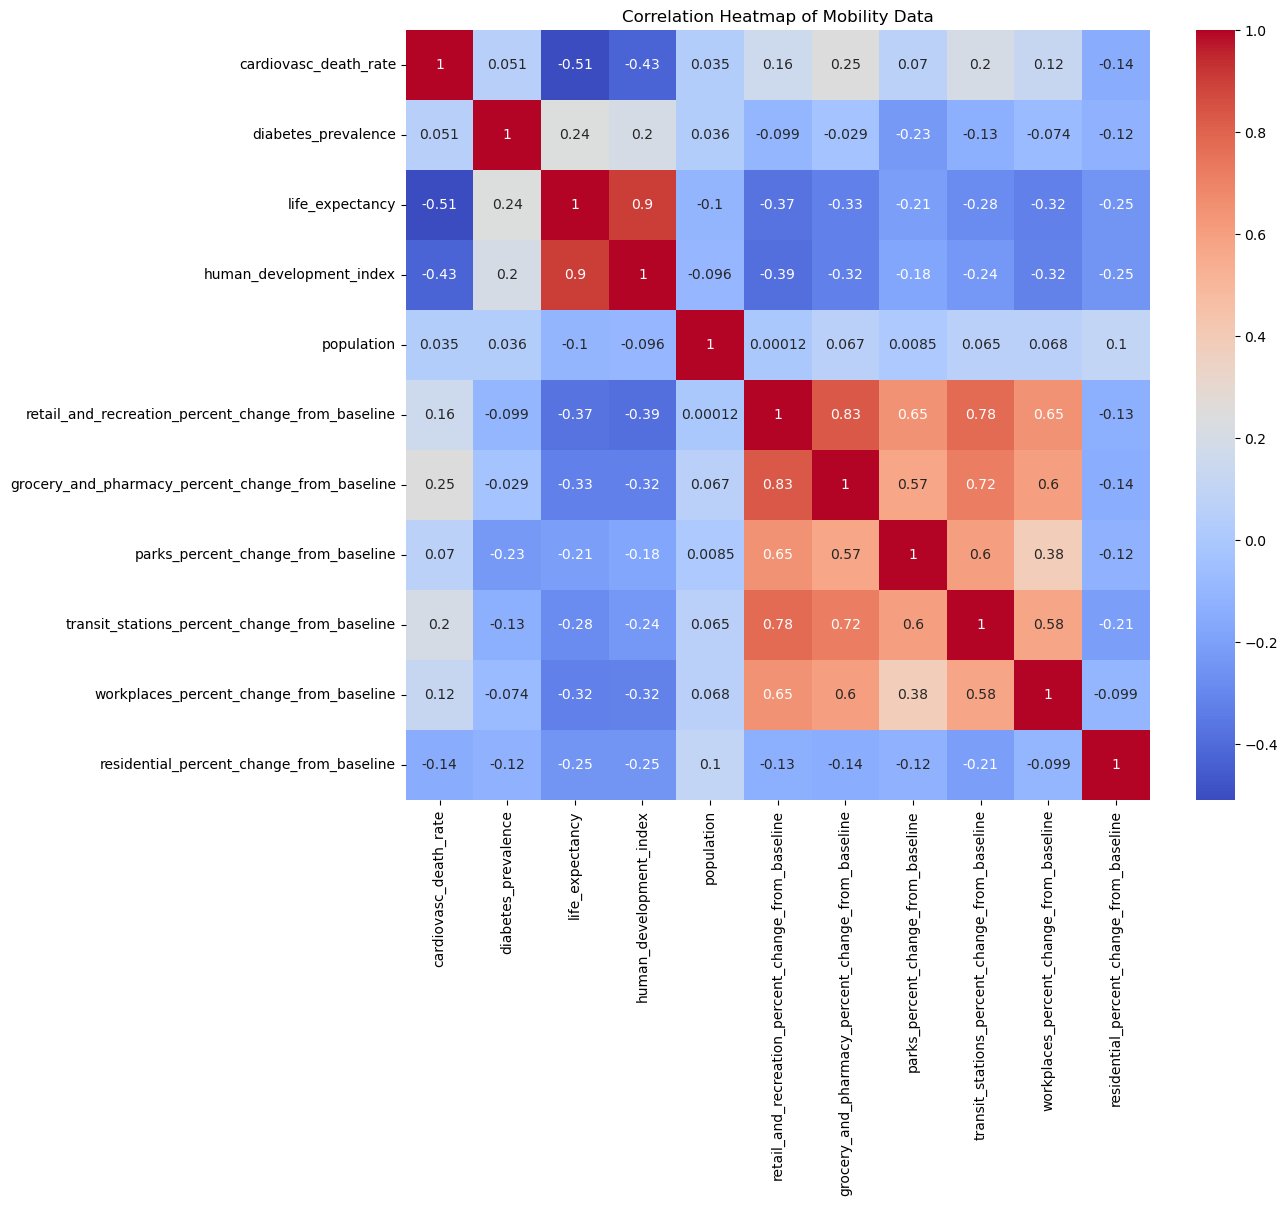

In [10]:
import seaborn as sns

# Calculating correlation matrix
select_cols = merged_df[['cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy', 'human_development_index', 'population', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]
correlation_matrix = select_cols.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Mobility Data')
plt.show()

# Scatter Plot

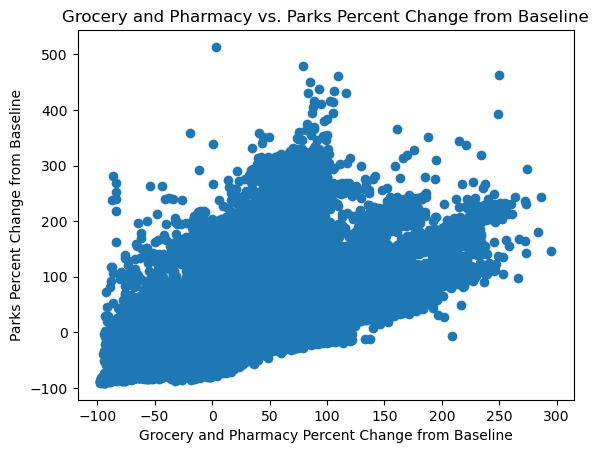

In [11]:
#Between Grocery and Pharmacy and Parks percent changes
plt.scatter(merged_df['grocery_and_pharmacy_percent_change_from_baseline'], merged_df['parks_percent_change_from_baseline'])
plt.title('Grocery and Pharmacy vs. Parks Percent Change from Baseline')
plt.xlabel('Grocery and Pharmacy Percent Change from Baseline')
plt.ylabel('Parks Percent Change from Baseline')
plt.show()


# Pair Plots

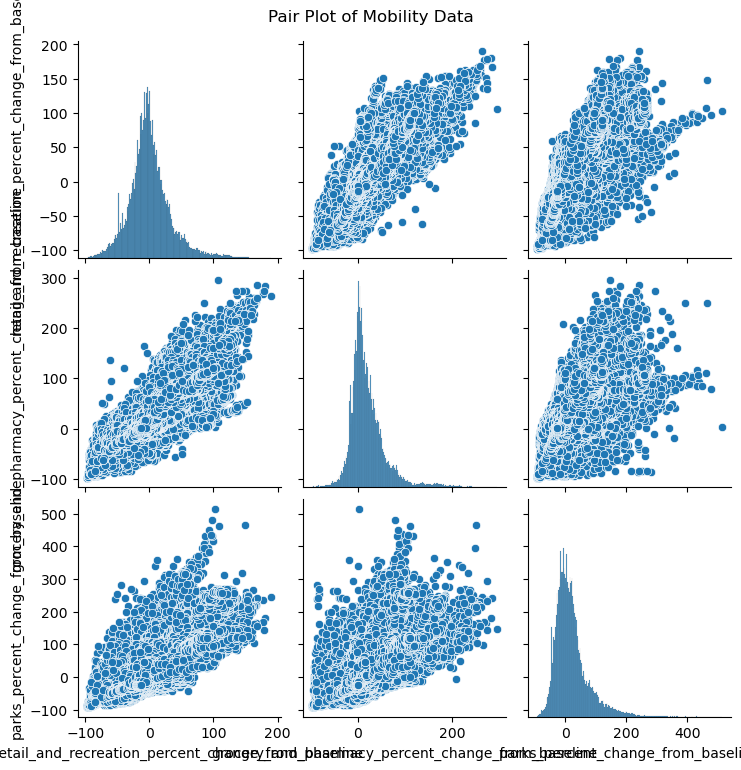

In [12]:
sns.pairplot(merged_df[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline']])
plt.suptitle('Pair Plot of Mobility Data', y=1.02)
plt.show()